In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torchvision

import pandas as pd
import numpy as np

In [2]:
print("Device Name:", torch.cuda.get_device_name(0))
print("Current Device:", torch.cuda.current_device())

Device Name: NVIDIA GeForce RTX 2050
Current Device: 0


In [3]:
torch.cuda.memory_allocated()

0

In [6]:
train_dataset = pd.read_csv("fashion-mnist_train.csv")
test_dataset = pd.read_csv("fashion-mnist_test.csv")

In [7]:
torch.manual_seed(42)

In [8]:
train_dataset.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [9]:
train_dataset.shape

(60000, 785)

In [10]:
test_dataset.shape

(10000, 785)

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

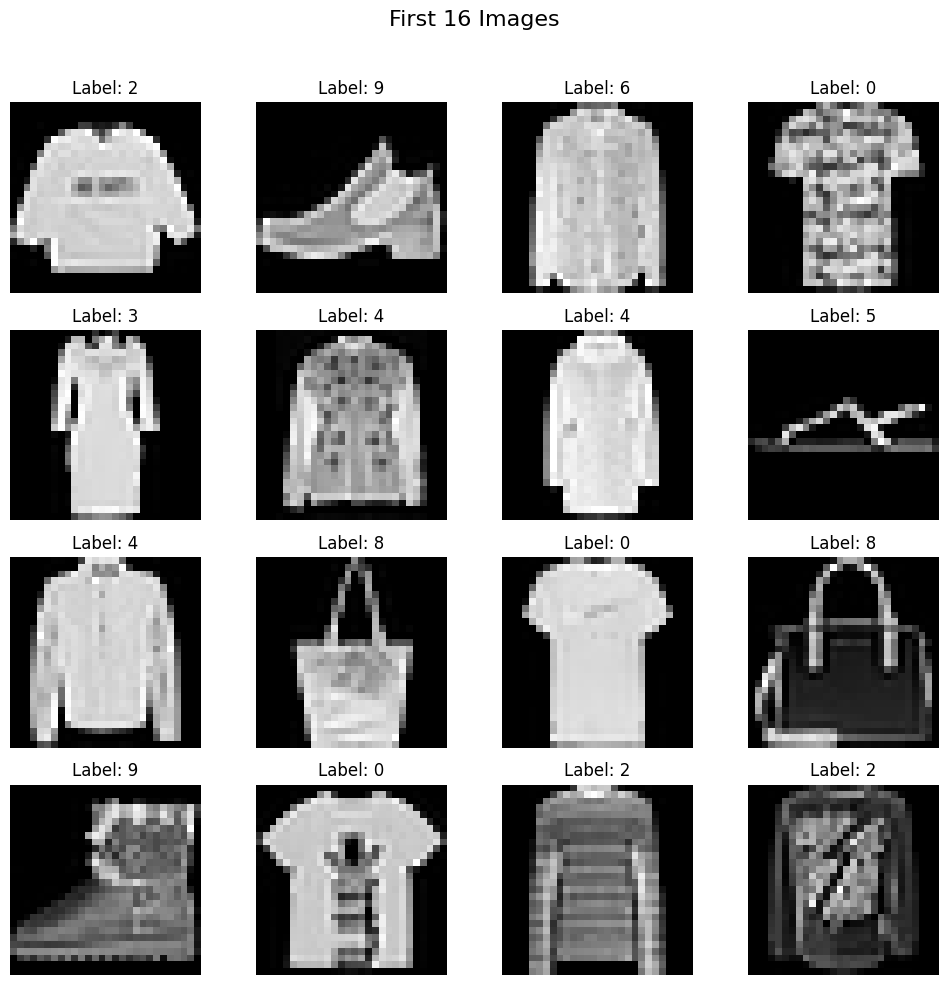

In [13]:
import matplotlib.pyplot as plt
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = train_dataset.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img, cmap="gray")  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {train_dataset.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = train_dataset.iloc[:,1:]

In [20]:
y = train_dataset.iloc[:,0]

In [22]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32).cuda()
    self.labels = torch.tensor(labels, dtype=torch.long).cuda()

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

In [27]:
# create train_dataset object
train_dataset = CustomDataset(X_train.values, y_train.values)

In [29]:
# create test_dataset object
test_dataset = CustomDataset(X_test.values, y_test.values)

In [30]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [31]:
len(train_loader)

750

In [32]:
len(test_loader)

188

In [33]:
train_dataset.features.shape[1]

784

In [34]:
class FufaNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
            # here we dont need to write the softmax code becuase pytorch handles it internally while using crossentropyloss
        )

    def forward(self, x):
        return self.network(x)
model = FufaNN(train_dataset.features.shape[1]).to(device)

In [35]:
loss_fc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [36]:
# training loop
epochs = 100

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = loss_fc(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.570167042096456
Epoch: 2 , Loss: 0.7864405195315679
Epoch: 3 , Loss: 0.6477659802834193
Epoch: 4 , Loss: 0.5766551177899043
Epoch: 5 , Loss: 0.533208113749822
Epoch: 6 , Loss: 0.50862065076828
Epoch: 7 , Loss: 0.4883606270949046
Epoch: 8 , Loss: 0.4734292020400365
Epoch: 9 , Loss: 0.46155828364690143
Epoch: 10 , Loss: 0.45136373533805213
Epoch: 11 , Loss: 0.44145345960060756
Epoch: 12 , Loss: 0.4320735406478246
Epoch: 13 , Loss: 0.4257844049135844
Epoch: 14 , Loss: 0.4186328670581182
Epoch: 15 , Loss: 0.41415403709808984
Epoch: 16 , Loss: 0.4080498971939087
Epoch: 17 , Loss: 0.40150490111112597
Epoch: 18 , Loss: 0.3962661226391792
Epoch: 19 , Loss: 0.39156668265660605
Epoch: 20 , Loss: 0.38824006301164626
Epoch: 21 , Loss: 0.3839801571170489
Epoch: 22 , Loss: 0.37872982368866603
Epoch: 23 , Loss: 0.3749736738006274
Epoch: 24 , Loss: 0.3722473280231158
Epoch: 25 , Loss: 0.3674630636870861
Epoch: 26 , Loss: 0.36476218754053114
Epoch: 27 , Loss: 0.360023323794206
Epoch:

In [37]:
# evaluation on test data
model.eval()
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8824166666666666


In [38]:
# evaluation on test data
model.eval()
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.927875


In [39]:
# our model is little overfitting

# After optimization

### To Optimize our model we can do following things
- Adding more data
- Reducing complexity of our NN architecture
- Regularization >> In deep learning we more use L2
- Dropouts
- Data Augmentaion >> Work better with CNN
- Batch Normalization 
- Early Stopping

In [53]:
class FufaNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(64, 10)
            # here we dont need to write the softmax code becuase pytorch handles it internally while using crossentropyloss
        )

    def forward(self, x):
        return self.network(x)
model = FufaNN(train_dataset.features.shape[1]).to(device)

In [54]:
loss_fc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

In [55]:
# training loop
epochs = 100

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = loss_fc(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 1.0384459110498427
Epoch: 2 , Loss: 0.6756653441985448
Epoch: 3 , Loss: 0.5970512015422186
Epoch: 4 , Loss: 0.5535572859247525
Epoch: 5 , Loss: 0.5355615862806639
Epoch: 6 , Loss: 0.5114861050844193
Epoch: 7 , Loss: 0.49598128787676493
Epoch: 8 , Loss: 0.48511381264527637
Epoch: 9 , Loss: 0.46949052407344183
Epoch: 10 , Loss: 0.4628350568811099
Epoch: 11 , Loss: 0.455747517824173
Epoch: 12 , Loss: 0.4430164634982745
Epoch: 13 , Loss: 0.4352995769381523
Epoch: 14 , Loss: 0.4327872295379639
Epoch: 15 , Loss: 0.4234673221707344
Epoch: 16 , Loss: 0.42278726424773533
Epoch: 17 , Loss: 0.41728230090936025
Epoch: 18 , Loss: 0.4081768334507942
Epoch: 19 , Loss: 0.40671728597084683
Epoch: 20 , Loss: 0.40132187455892565
Epoch: 21 , Loss: 0.3968359819948673
Epoch: 22 , Loss: 0.39595335054397585
Epoch: 23 , Loss: 0.39267852568626405
Epoch: 24 , Loss: 0.38652655617396037
Epoch: 25 , Loss: 0.38420321949323016
Epoch: 26 , Loss: 0.37711990815401075
Epoch: 27 , Loss: 0.3763819020589192

In [56]:
model.eval()

FufaNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [57]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8885


In [58]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9416041666666667
